# 1. Задание
*Click arrow on the left to toggle*

В нашей CPA-сети проходит акция для вебмастеров, в которой за каждую одобренную </br>
конверсию, вебмастер получает некое количество баллов (в зависимости от стоимости </br>
оффера). Заработанные баллы вебмастер может потратить либо в магазине подарков </br>
либо в казино.

Заказчик акции направил список ключевых подарков, которые необходимо разыграть в </br>
рамках казино. Основная задача казино - подогреть интерес к акции и стимулировать </br>
вебмастера налить больше конверсий, поэтому все подарки не должны быть выиграны </br>
до того, как казино закончится (иначе вебмастер потеряет мотивацию). </br>

Логика работы казино: </br>
У каждого вебмастера есть свой баланс баллов. Попадая на страницу казино, он видит </br>
большую коробку, нажав на которую, он совершает спин. </br>
Концептуально, каждый спин приносит вебмастеру какой-то выигрыш, но не </br>
обязательно из списка ключевых подарков: помимо них, вебмастер может выиграть </br>
баллы, которые могут быть потрачены на дальнейшие спины (пустышки). </br>

**Материалы:** </br>
- Список ключевых подарков с количеством позиций
- Список конверсий каждого вебмастера и количество полученных баллов по ним за первые 3 месяца акции
- Баллы по офферам на оставшийся период акции

**Условия:** </br>
- Акция проходит с 01.07.23 по 29.02.24
- Казино начнет работу с 01.11.2023
- Баллы начисляются вебмастеру сразу же после принятия конверсии
- Казино будет активно пока не будут разыграны все ключевые подарки
- Каждое нажатие (спин) вебмастер что-то выигрывает (не бывает пустых выигрышей)
- Стоимость спина фиксированная
- Каждый выигрыш система выбирает абсолютно рандомно, при этом исключая каждую выигранную позицию из списка возможных выигрышей
- Баллы за конверсию на оффер могут меняться каждый месяц

**Задача:** </br>
1. Проанализировать имеющуюся информацию и предложить: </br>
- стоимость одного спина </br>
- итоговый список подарков с предложением по количеству и “стоимости” пустышек в балловом эквиваленте </br>

*Необходимо также учесть пожелание заказчика, чтобы казино просуществовало активным до последнего месяца акции.* </br>

2. Составьте минимум одно предложение и обоснуйте его: </br>
- Какова в таком случае вероятность выигрыша ключевого приза? </br>
- Какой порог вхождения по количеству конверсий для участия в казино у вебмастера? </br>
- Какой % из общей выборки вебмастеров смогут попытать удачу при ваших условиях? </br>

*Если вы считаете, что необходимо ввести лимит на количество спинов за какой-то промежуток времени, также можете обосновать.* </br>

# 2. Решение
*Click arrow on the left to toggle*

Для расчёта модели потребуются:  </br>

1. Стоимость спина </br>
2. Количество баллов </br>
3. Количество подарков = спинов </br>
4. Вероятности подарков </br>

Важные условия:  </br>

1. Стоимость спина не изменяется </br>
2. Вероятность получения подарка = 100% </br>
3. Сроки акции с 01.07.23 до 29.02.24 </br>


### План действий

1. Анализ баллов, их динамики и распределения </br>
- Получение и обработка данных
- Тренд суммы баллов
- Распределение баллов среди вебмастеров
- Влияние вебмастеров на тренд баллов
2. Прогноз количества баллов до конца акции </br>
- Подготовка данных
- Линейная регрессия
- Прогноз до 29.02.24
- Объединение данных
3. Расчёт параметров экономики казино </br>
- Итоги
- Модель
- Проверка
- Призы баллами
- Топовые вебмастера
- Вебмастера без спинов

### Допущения

Ввиду отсутствия реальных данных о: </br>

1. Выручках (общей и по каждому вебмастеру) за 2022 и 2023 годы </br>
2. Бюджету акции (в валюте) </br>
3. Проценту начисления баллов по офферам </br>
4. Лимиту количества вебмастеров (факт кол-ва участников CPA-сети) </br>
5. Потенциале количества конверсий (сезонность) </br>

Просьба принять во внимание: </br>

1. Модель максимально упрощена и дает ответы только на заданные вопросы, а не на "интересные в рамках боевого проекта". </br>
2. Предполагается, что тренд баллов и пропорции вебмастеров в нем сохранятся до конца акции. </br>
3. Многие уловия не были приняты во внимание, т.к. невозможно адекватно оценить их влияние на модель. </br>
4. Все описанное ниже - усредненная вероятность, т.к. все 503 ключевые приза могут быть выиграны в первые 503 спина. </br>
5. Местами присутствуют грубые округления, т.к. это тестовое задание, в котором важна лишь сама модель. </br>

### Ответы

1. Стоимость одного спина </br>
Ответ: **15 баллов**

2. Итоговый список подарков с предложением по количеству и “стоимости” пустышек в балловом эквиваленте </br>
Ответ: **6250 подарков, где 503 ключевых и 5 747 баллами; ср. выигрыш баллами - 5**

3. Какова в таком случае вероятность выигрыша ключевого приза? </br>
Ответ: **8%**

4. Какой порог вхождения по количеству конверсий для участия в казино у вебмастера? </br>
Ответ: **не ограничено; на практике понадобится 3-5 конверсий**

5. Какой % из общей выборки вебмастеров смогут попытать удачу при ваших условиях? </br>
Ответ: **при сохранении тренда и пропорций; принять участие смогут 50%**

### Улучшения

**Для тестового задания:**

1. Просчитать разные сценарии тренда (погнуть модель) 
2. Составить график распределения баллов по вебмастерам
3. Рассчитать вариант подарков с х100 баллами в системе 
4. Заложить риски поверх текущих баллов вне системы (2%+5%)
5. Написать симулятор с расчётом баллов (получили\потратили) и подарков (выграли)

**Для боевого проекта:**

*Суть акции: заработать на увеличении количества конверсий за стоимость выделенного бюджета.* </br>
*Ключевая метрика: прирост выручки в текущем периоде по сравнению с аналогичным периодом прошлого* </br>
*года (если акций раньше не было) или предыдущим месяцем\кварталом (менее точно).* </br>
*Это то, что стоило бы считать на боевом проекте, но увы, не здесь.* </br>

1. Расчёт ключевой метрики (понять, дала ли эффект акция и какой ROI у этого проекта)
2. Корректировка модели с учетом выручки (через "баллы за офферы" и "стоимость пустышек")
3. Корректировка модели с учетом бюджета 
4. Корректировка модели с учетом сезонности 
5. Корректировка модели с учетом динамики вебмастеров

## 2.1. Аналитика
*Click arrow on the left to toggle*

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Получаем материалы и смотрим, что внутри
# Лист "Конверсии" основной для работы
# Лист "Ключевые подарки" использоваться не будет, главное: их там 503
# Лист "Баллы офферов" использоваться не будет, см. Выводы

xl = pd.ExcelFile('Тестовое_данные.xlsx')
# xl.sheet_names

conv = xl.parse('Конверсии')
gift = xl.parse('Ключевые подарки')
pts = xl.parse('Баллы офферов')
conv.head()
# gift.head()
# opts.head()

,ID Вебмастера,Статус конверсии,Заработанные баллы,ID Оффера,Дата
0,2.0,Принято,7,8,2023-07-01 12:46:27
1,45.0,Принято,5,49,2023-07-01 13:02:05
2,135.0,Принято,7,15,2023-07-02 09:56:59
3,207.0,Принято,7,15,2023-07-02 09:59:01
4,190.0,Принято,7,15,2023-07-02 10:35:08


In [3]:
# Считаем общую сумму баллов на каждую дату
# Убираем столбец статуса, т.к. там только "принято"
# Добавляем столбец со счетчиком суммы баллов 
# Удаляем строчки с пустыми данными (2 шт. без ID)
# Переводим ID в int

pts_sum = []
cnt = 0
for i in conv['Заработанные баллы']:
    cnt += i
    pts_sum.append(cnt)
# pts_sum

conv.drop(labels='Статус конверсии', axis=1, inplace=True)
conv['Сумма баллов'] = pts_sum
conv.dropna(inplace=True)
conv['ID Вебмастера'] = conv['ID Вебмастера'].astype('int64')
conv.tail()

,ID Вебмастера,Заработанные баллы,ID Оффера,Дата,Сумма баллов
4100,224,7,15,2023-09-30 17:35:18,24654
4101,192,7,15,2023-09-30 17:41:03,24661
4102,39,7,15,2023-09-30 17:42:19,24668
4103,365,7,15,2023-09-30 17:42:58,24675
4104,296,7,15,2023-09-30 17:45:05,24682


<Axes: xlabel='Дата', ylabel='Сумма баллов'>

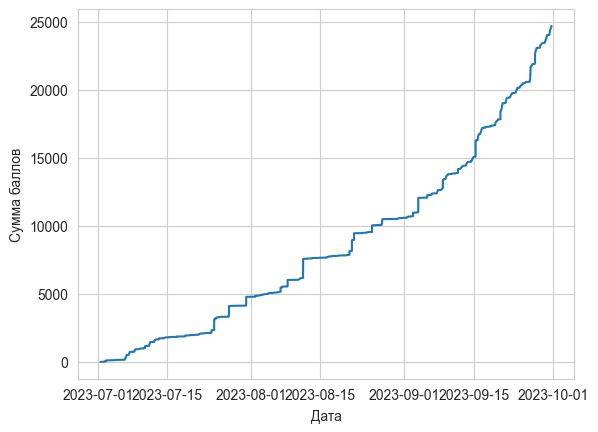

In [4]:
# Смотрим какой тренд по баллам
# Видим, что ускоряется - посчитаем прирост

sns.set_style("whitegrid")
sns.lineplot(data=conv, x='Дата', y='Сумма баллов')

<Axes: xlabel='Неделя', ylabel='Заработанные баллы'>

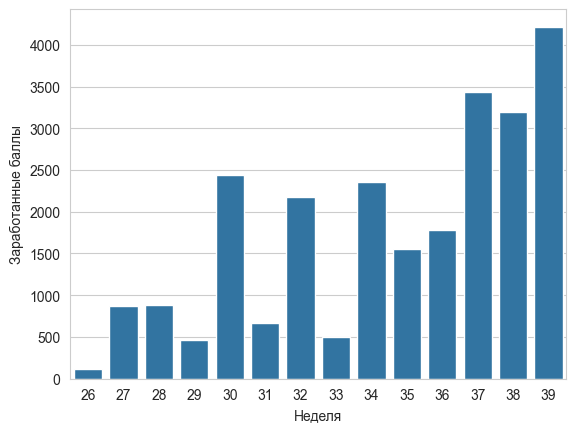

In [5]:
# Вывели суммы полученных баллов за каждую неделю
# Попробуем разобраться в причинах, для этого заглянем внутрь

conv['Неделя'] = conv['Дата'].dt.isocalendar().week
pts_wks = conv.groupby('Неделя')['Заработанные баллы'].sum()

sns.barplot(data=pts_wks)

In [6]:
# Смотрим, как распределены баллы среди вебмастеров
# Видим неравенство: три четверти имеют по 44 балла, а кто-то - 1566.
# Это потенциальная проблема, рассмотрим получше, чтобы понять как решать

pts_wm = conv.groupby('ID Вебмастера')['Заработанные баллы'].sum()
pts_wm.describe()

count     440.000000
mean       56.065909
std       146.224303
min         3.000000
25%         7.000000
50%        15.000000
75%        44.000000
max      1566.000000
Name: Заработанные баллы, dtype: float64

In [27]:
# На 30.09.2023:
# 52 из 440 вебмастеров (11.82%)
# заработали больше l=100 баллов
# и владеют 15 814 из 24 682 баллами (64.07%);
# 218 из 440 вебмастеров (49.54%)
# заработали меньше k=15
# и владеют 1 688 из 24 682 баллами (6.84%).

l = 100
k = 15
pts_wm = pd.DataFrame(pts_wm)
pts_wm.reset_index(inplace=True)
pts_wm.sort_values(by=['Заработанные баллы'], inplace=True)
top_wm = pts_wm['ID Вебмастера'][pts_wm['Заработанные баллы']>=l].count() 
top_pts = pts_wm['Заработанные баллы'][pts_wm['Заработанные баллы']>=l].sum()
bot_wm = pts_wm['ID Вебмастера'][pts_wm['Заработанные баллы']<k].count()
bot_pts = pts_wm['Заработанные баллы'][pts_wm['Заработанные баллы']<k].sum()
ttl_pts = pts_sum[-1]
ttl_wm = pts_wm['ID Вебмастера'].count()
prt_wm = top_wm / ttl_wm * 100
prt_pts = top_pts / ttl_pts * 100
pts_wm.tail()

# print('На 30.09.2023 всего',top_wm,'из',ttl_wm,'вебмастеров (','%.2f'%prt_wm,'% )','смогли заработать больше 100 баллов и владеют',top_pts,'из',ttl_pts,'баллами (','%.2f'%prt_pts,'% ).')

,level_0,index,ID Вебмастера,Заработанные баллы
435,435,123,135,781
436,436,127,139,921
437,437,140,153,1155
438,438,209,224,1517
439,439,278,296,1566


In [8]:
# Разделим вебмастеров на две группы
# И посмотрим на долю этих групп в разрезе недель
# Считаем сколько заработал каждый вебмастер,
# Выбираем со 100+ баллами

group_wm = conv.groupby('ID Вебмастера')['Заработанные баллы'].sum()
group_wm = pd.DataFrame(group_wm)
group_wm.reset_index(inplace=True)
group_wm = group_wm[group_wm['Заработанные баллы']>=l]
group_wm = group_wm['ID Вебмастера'].tolist()
group_top = conv[conv['ID Вебмастера'].isin(group_wm)]
group_top.head()


,ID Вебмастера,Заработанные баллы,ID Оффера,Дата,Сумма баллов,Неделя
0,2,7,8,2023-07-01 12:46:27,7,26
2,135,7,15,2023-07-02 09:56:59,19,26
3,207,7,15,2023-07-02 09:59:01,26,26
4,190,7,15,2023-07-02 10:35:08,33,26
25,21,7,15,2023-07-06 09:39:13,166,27


In [9]:
# Считаем общую сумму баллов для вебмастеров со 100+ баллами 30.09.2023
# И выносим их в отдельную таблицу

top_sum = []
cnt = 0
for i in group_top['Заработанные баллы']:
    cnt += i
    top_sum.append(cnt)
# top_sum

group_top.drop(labels='Сумма баллов', axis=1, inplace=True)
group_top['Баллы ТОПов'] = top_sum
group_top.tail()


/var/folders/dc/jr4y5vr12n543l72hqx8pjfw0000gn/T/ipykernel_14457/3862579655.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_top.drop(labels='Сумма баллов', axis=1, inplace=True)
/var/folders/dc/jr4y5vr12n543l72hqx8pjfw0000gn/T/ipykernel_14457/3862579655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_top['Баллы ТОПов'] = top_sum


,ID Вебмастера,Заработанные баллы,ID Оффера,Дата,Неделя,Баллы ТОПов
4098,224,7,15,2023-09-30 17:15:29,39,15786
4100,224,7,15,2023-09-30 17:35:18,39,15793
4102,39,7,15,2023-09-30 17:42:19,39,15800
4103,365,7,15,2023-09-30 17:42:58,39,15807
4104,296,7,15,2023-09-30 17:45:05,39,15814


<Axes: xlabel='Дата', ylabel='Сумма баллов'>

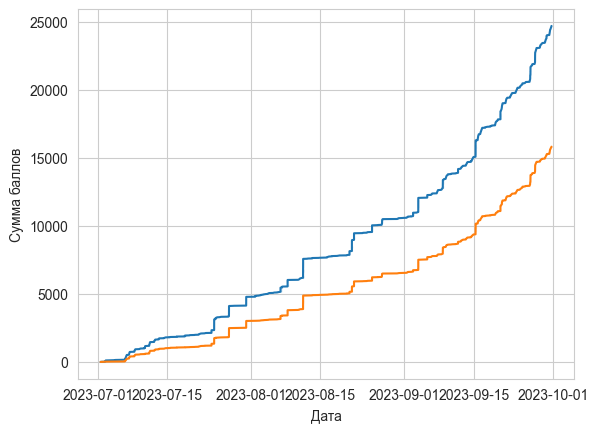

In [10]:
# Смотрим на динамину по вебмастерам:
# Видим, что графики схожи
# Кто влияет на тренд больше? Кто может его изменить в будущем?

sns.lineplot(data=conv, x='Дата', y='Сумма баллов')
sns.lineplot(data=group_top, x='Дата', y='Баллы ТОПов')

58.98 % от всех заработанных баллов держали топовые вебмастера в среднем в течение всего периода


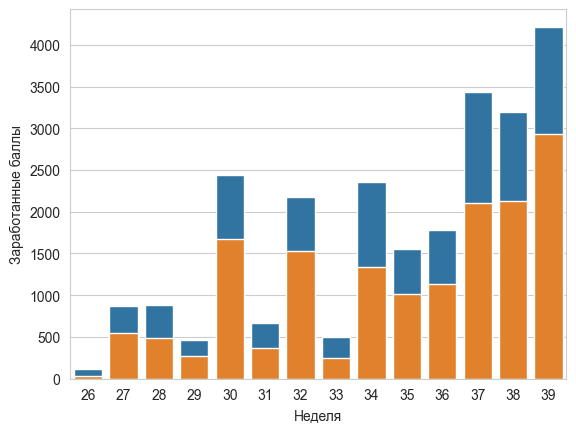

In [11]:
# 1. Как влияют на тренд топовые вебмастера?
# Доля топов стабильно около 60% на протяжении всего периода
# Значит, вероятность того, что в будущем изменится пропорция по группам вебмастеров - мала

pts_wks = conv.groupby('Неделя')['Заработанные баллы'].sum()
top_wks = group_top.groupby('Неделя')['Заработанные баллы'].sum()

sns.barplot(data=pts_wks)
sns.barplot(data=top_wks)

pts_top = top_wks / pts_wks * 100
print('%.2f'%(pts_top.sum()/(len(pts_top))),'% от всех заработанных баллов держали топовые вебмастера в среднем в течение всего периода')

<Axes: xlabel='Неделя', ylabel='ID Вебмастера'>

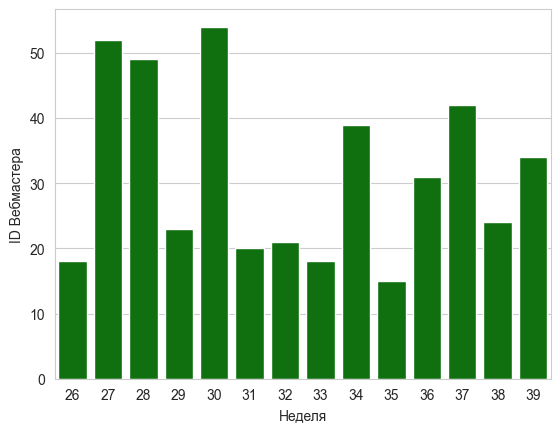

In [12]:
# 2. Связана ли эта динамика с появлением новых вебмастеров? 
# Получаем первое упоминание каждого ID и смотрим на даты
# Видим, что корреляция слабая
# Значит, появление новых вебмастеров в будущем не должно сильно повлиять на тренд

new_wm = conv.drop_duplicates(subset='ID Вебмастера', keep='first')
new_wm = new_wm.groupby('Неделя')['ID Вебмастера'].count()
# new_wm.mean()

# sns.scatterplot(x=new_wm['Дата'], y=new_wm['ID Вебмастера'], color='green')
sns.barplot(data=new_wm, color='green')


## 2.2. Прогнозирование
*Click arrow on the left to toggle*

In [13]:
# Добавим счётчик дней, т.к. модель не умеет нормально работать с датами
# Все остальное уберем

conv['День'] = conv['Дата'].dt.dayofyear
conv_mod = conv[['День','Сумма баллов']]
conv_mod.tail()

,День,Сумма баллов
0,182,7
1,182,12
2,183,19
3,183,26
4,183,33
...,...,...
4100,273,24654
4101,273,24661
4102,273,24668
4103,273,24675


In [14]:
# Делим таблицу на две части в случайном порядке
# На одной учим, на второй проверяем

n = np.random.rand(len(conv)) < 0.8
train = conv_mod[n]
test = conv_mod[~n]

train_x = np.asanyarray(train[['День']])
train_y = np.asanyarray(train[['Сумма баллов']])

test_x = np.asanyarray(test[['День']])
test_y = np.asanyarray(test[['Сумма баллов']])

Text(0, 0.5, 'Сумма баллов')

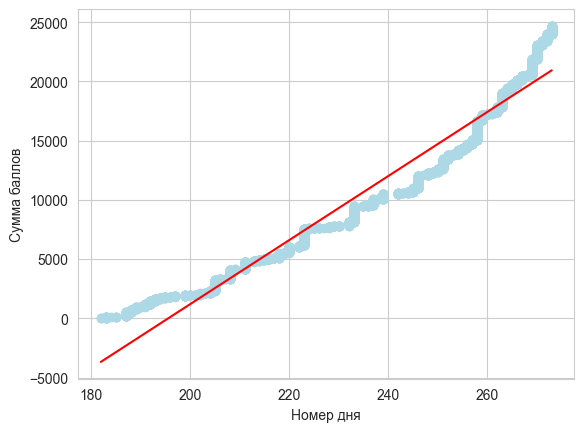

In [15]:
# Делаем линейный прогноз по сумме
# Т.к. тренд стабильный, а задача упрощена

lr = linear_model.LinearRegression()
lr.fit(train_x, train_y)

plt.scatter(conv_mod['День'], conv_mod['Сумма баллов'],  color='lightblue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')
plt.xlabel("Номер дня")
plt.ylabel("Сумма баллов")

In [16]:
# Проверяем полученное

predictions = lr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("MSE: %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predictions))

MAE: 1307.42
MSE: 2595324.84
R2-score: 0.95


In [17]:
# 01.07.23 это 182-й день в году, 
# 30.09.23 это 273-й день в году, 
# 29.02.24 это 60-й день в году; 
# разница между началом и концом акции 244 дня.
# Для простоты и скорости делаем: 182 + 244 = 426, т.е. Номера дней в акции будут с 182 по 426.

pred_x = list(range(274,427))
pred_x = pd.DataFrame(pred_x)
pred_x = np.asanyarray(pred_x)

predictions = lr.predict(pred_x)
# predictions


In [18]:
# Собираем предсказание в отдельную таблицу
# И объединяем имеющиеся данные с предсказанными

pred_x = pd.DataFrame(pred_x)
predictions = pd.DataFrame(predictions)
forecast = pd.concat([pred_x,predictions], axis=1)
forecast.columns = ["День","Сумма баллов"]
#forecast

conv_forecast = pd.concat([conv_mod,forecast])
#conv_forecast

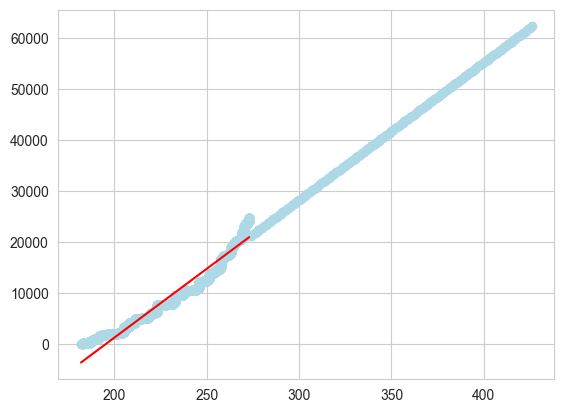

In [19]:
# Так эти данные выглядят теперь (мы просто продолжили линию модели)

plt.scatter(conv_forecast['День'], conv_forecast['Сумма баллов'],  color='lightblue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')

## 2.3. Выводы
*Click arrow on the left to toggle*

На конец акции 29.02.2024: </br>

Баллов, всего **62 500** </br>
Баллов у топовых 62 500 * 0.59 = **36 875** </br>
Баллов у остальных 62 500 * 0.41 = **25 625** </br>

Вебмастеров, всего **1 538** (прирост 4.5 в день) </br>
Вебмастеров топовых 1 538 * 0.12 = **185** </br>
Вебмастеров остальных 1 538 * 0.88 = **1 353** </br>

Баллов в среднем у топовых 36 875 \ 185 = **199** </br>
Баллов в среднем у остальных 25 625 \ 1 373 = **19** </br>

Подарков, всего **503** </br>
Стоимостью в баллах 62 500 \ 503 = **125** </br>

То есть, если стоимость одного спина = 125 баллов, то к концу акции все баллы будут потрачены и все подарки выиграны. </br>
Мешает этому только распределение: вебмастера вне топов не смогут участвовать и 26к баллов останутся неиспользованными. </br>
Что делать? Удешевляем спины. Как? Увеличиваем количество призов - снижается стоимость.  </br>
Проблема в том, что нет "пустых подарков" и вместе с количеством призов, растёт и количество баллов. </br>
Помимо прочего, не хотелось бы, чтобы все подарки выйграла пара человек у которых уже по 1000+ на счету. </br>

### Модель

Баллов заработанных **62 500** </br>
Баллов выигранных **28 735** </br>
Баллов, всего в системе **91 235** </br>

Призов ключевых **503** </br>
Призов баллами **5 747** </br>
Призов, всего в системе **6 250** </br>

Стоимость спина или приза 91 235 \ 6 250 = **14.6** (округляем до 15) </br>
Стоимость приза баллами 91 235 \ 5 747 = **15.9**  </br>
Стоимость приза ключевого 91 235 \ 503 = **181.4**  </br>

Вероятность выигрыша приза баллами 5 747 \ 6 250 = **92.0%** </br>
Вероятность выигрыша приза ключевого 503 \ 6 250 = **8.0%** </br>

Примечания: </br>

Эквилибриум количества призов, суммы баллов и ост. продиктован одной вещью - стоимостью спина, которая должна быть доступной. </br>
Стоимость приза = стоимости спина - по условиям задачи, т.к. не бывает пустых выигрышей. </br>
Почему стоимость приза баллами выше общей? Может "неповезти" - выпадет ключевой в 1\13 случаев и придётся тратить дополнительные 15.9 - 14.6 = 1.3 балла. </br>
По ключевому логика: нужно 13 спинов по 15 баллов, чтобы "получить" 104% КП за 195 баллов. </br>

### Прогон-проверка

Тратим 62 500 по 15 на спин, делаем 4 166 спинов </br>
из них получаем 8% ключевыми подарками - 333 шт. </br>
остальные 92% приносят на по 5 баллов в среднем - 19 163 баллов </br>

Тратим 19 163 по 15 на спин, делаем 1 277 спинов </br>
из них получаем 8% ключевыми подарками - 102 шт. </br>
остальные 92% приносят на по 5 баллов в среднем - 5 870 баллов </br>

Тратим 5 870 по 15 на спин, делаем 391 спин </br>
из них получаем 8% ключевыми подарками - 31 шт. </br>
остальные 92% приносят на по 5 баллов в среднем - 1 795 баллов </br>

И так далее... Каждый раз возвращая по 30% от потраченного, </br>
как и заложено системой, с потерями на округление. </br> 
Если идти от обратного: </br>

Делаем 6 250 спинов по 15 баллов, тратим 93 750 </br>
из них 5 747 приносят нам в среднем 5 баллов, суммарно 28 735 </br>
"Вне игры" остаются: 2 515 баллов или 168 спинов </br>

Т.е. разыграно по итогу будет 98% призов. </br>
Этот люфт можно оставить на непредвиденные ситуации вроде изменения тренда или фрод. </br>
На край, дораздать (разыграть за репост?) эти 2 515 баллов под конец февраля. </br>

### Про призы баллами или "пустышки"

Cоздаем 5 747 призов с соблюдением следующих условий: </br>
Приз > 0. Сумма стоимости всех призов 28 735 баллов. </br>
Медиана меньше половины стоимости спина, иначе риск бесконечного заработка на самих спинах. В нашем случае будет 5. </br>
Разброс любой, но самое простое: от 1 до 9. Если "некрасиво" или "скудно": умножаем Все баллы в системе на 100 - теперь у нас в 100 раз больше вариантов "пустышек". </br>

Что внутри-то? </br>

|Приз, баллов|1|2|3|4|5|6|7|8|9|
|---|-|-|-|-|-|-|-|-|-|
|Вероятность|4%|8%|12%|16%|20%|16%|12%|8%|4%|
|Количество, призов|230|460|690|920|1147|920|690|460|230|
|Сумма, баллов|230|920|2070|3680|5735|5520|4830|3680|2070|

### Про лучших из лучших или "балловых олигархов"

Что имеем? Топ 3 уже на 30.09.2023 владеют по 1000+ баллами, дальше будет больше. </br>

|ID|296|224|153|Сумма|
|-|-|-|-|-|
|Баллов, t0|1566|1517|1155|4238|
|Доля, t0|6.3%|6.1%|4.7%|17.5%|
|Баллов, t1|5747|5565|4288|15600|

Как это повлияет на систему и опасно ли это? </br>
За 17% баллов они получат 17% призов = 977 шт. </br>
Среди которых всего 1/13 будут ключевыми. </br>
Значит, эти трое смогут забрать 75 ключевых призов. </br>

Теперь важное: если прописать некоторые воображаемые у.е. в таблице "Ключевые призы" </br>
То можно сделать предположение, что общий бюджет составил 1 500 000 у.е. </br>
Таким образом, средняя стоимость приза равна 3 000 у.е., </br> 
а наши "олигархи" смогут выиграть фантастические 225 000 у.е. </br>

Много это или мало: неизвестно. Для адекватного расчёта и решения этой проблемы </br>
нужны реальные данные по выручкам, офферам и бюджетам. </br>

Если вдруг это "много": Можно ввести лимиты на "один ключевой приз в одни руки" </br>
или "максимум n ключевых призов в периоде t", а можно и комбинировать. </br>

Из лимитов, полезных всегда: "n спинов в день" для каждого вебмастера, как мягкий антифрод. В нашем случае, около 10. </br>

### Про тех, кто остался за бортом

Что имеем? На 30.09.2023 почти половина - 218 из 440 вебмастеров имеют менее 15 баллов, суммарно это 1 688. </br>
При сохрании тренда и пропорций, упомянутые выше 218 продолжат зарабатывать, но появятся новые вебмастера, которые заработать больше 15 не успеют. </br>
Единственное, что изменится со временем - это количество баллов на счетах тех, кто имеет менее 15, оно достигнет 4 274. </br>

Итого, у нас 50% вебмастеров владеют около 5% всех баллов. </br>
Всю эту сумму "вне игры" можно опять же раздать под конец февраля. </br>